<a href="https://colab.research.google.com/github/KatiaKozlova/stat-project/blob/main/stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Research in Degree Semantics

Notebook by *Daria Sidorkina* & *Kate Kozlova*

### **Libraries**:

In [4]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE)

In [ ]:
install.packages('rstatix')

In [9]:
library(dplyr)
library(tidyverse)
library(jsonlite)
library(rstatix)

## **Experiment 1**

### **Import of the collected data**:

In [1]:
lion_exp <- read.csv(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp1/results_exp1.csv'
    )

### **Data pre-processing and statistics**:

In [ ]:
# omitting the time-stamps and division into 4 groups

lion_exp <- lion_exp[, -c(1:2)]

In [ ]:
# minimal, maximal, average of each sentence
# number and standart deviation

lion_exp_stats <- as.data.frame(t(sapply(
    lion_exp,
    function(x) c(
        avg = mean(x, na.rm = TRUE),
        min = min(x, na.rm = TRUE),
        max = max(x, na.rm = TRUE),
        st_dev = sd(x, na.rm = TRUE),
        count = length(which(!is.na(x)))
        )
        )))

In [ ]:
# adding rownames

lion_exp_stats <- rownames_to_column(lion_exp_stats, var = "stimuli")
lion_exp_stats <- tibble::rowid_to_column(lion_exp_stats, "id")

In [ ]:
# manually omitting fillers (only stimuli are left)

lion_stimuli <- lion_exp_stats[
    -c(1, 3, 6, 10, 11, 18, 19, 20,
    24, 29, 34, 35, 37, 38, 39, 40,
    43, 45, 46, 50, 51, 53, 58, 60,
    62, 65, 68, 69, 72, 76, 78, 80), -1]

rownames(lion_stimuli) <- 1:nrow(lion_stimuli)

In [ ]:
# solving several problems
# (doubled sentence and broken encoding)

mean_ch <- mean(lion_stimuli$avg[c(20, 39)])
sum_ch <- sum(lion_stimuli$count[c(20, 39)])
lion_stimuli$avg[20] <- mean_ch
lion_stimuli$count[20] <- sum_ch
lion_stimuli <- lion_stimuli[-39, ]
rownames(lion_stimuli) <- 1:nrow(lion_stimuli)

lion_stimuli <- lion_stimuli %>%
  mutate(stimuli = str_replace_all(stimuli, "\\.\\.", "\\,\\ ")) %>%
    mutate(stimuli = str_replace_all(stimuli, "\\.", "\\ "))

In [ ]:
# ordering in alphabetical order (groups by four)
# saving as CSV

lion_stimuli_sorted <- lion_stimuli[order(lion_stimuli$stimuli),]

write.csv(lion_stimuli_sorted,"results_exp1_statistics.csv", row.names = FALSE)

### **Data analysis and preliminary findings**:

We took 4 as minimum average score of the sentence to be considered as acceptable (according to the human reasoning).

In [ ]:
lion_stimuli_sorted[lion_stimuli_sorted$avg > 4, ]

,stimuli,avg,min,max,st_dev,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,Вода в ванне немного горячая,4.303030,2,5,0.8472326,33
5,Вода в ванне немного холодная,4.352941,1,5,1.2030858,34
33,Вода в ванне совершенно холодная,4.423077,2,5,0.8566482,26
45,Все студенты в пятой группе немного ленивые,4.647059,2,5,0.7337059,34
14,Интернет в общежитии немного медленный,4.363636,1,5,1.2946569,33
44,Комната Вадика немного тёмная,4.470588,2,5,0.8611231,34
3,Комната Вадика совершенно тёмная,4.264706,1,5,0.9941899,34
41,Лицо на той картине немного уродливое,4.235294,1,5,1.1821609,34
24,Лицо на той картине совершенно уродливое,4.333333,2,5,0.9895285,33


**Our findings**:

Adjectives in bold font represent **prevalence** in acceptability of modification with degree modifiers or the only possible variant of modification.

Three acceptable collocations:
- **грязный** – чистый (dirty – clean, *чистый* with *совершенно* (completely));
- **холодный** – горячий (cold – hot, *горячий* with *немного* (slightly)).

Two acceptable collocations:
- светлый – **тёмный** (light – dark);
- умный – **глупый** (smart – stupid);
- красивый – **уродливый** (beautiful – ugly).

One acceptable collocations (all with *немного* (slightly)):
- быстрый – **медленный** (fast – slow);
- **злой** – добрый (good – bad)$^1$;
- **ленивый** – трудолюбивый (lazy – hard-working);
- храбрый – **трусливый** (brave – fearful).

Zero acceptable collocations:
- щедрый – скупой (generous – stingy);
- высокий – низкий (tall – short);
- тяжёлый – лёгкий (heavy – light).


$^1$ It should be mentioned that we accidentally skiped one variant *совершенно добрый* (completely kind).

## **Experiment 2**

### **Import of the collected data**:

In [10]:
# opening JSON and making a tibble out of it

raw_second_exp <- fromJSON(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp2/results_exp2.json',
    flatten=TRUE
    ) %>% as_tibble()

In [11]:
# reframing and transposing into a dataframe

flatten_second_exp <- raw_second_exp %>%
  mutate(across(where(is.list), as.character))

second_exp <- flatten_second_exp[-1] %>%
  t() %>%
    as.data.frame() %>%
      setNames(
        c('id_person', 'id_item',
        'id_list', 'adjective',
        'type', 'judgement',
        'print_time', 'judge_time')
        )

In [12]:
# creating a column with timing of each answer

second_exp$clean_time <- (as.numeric(second_exp$judge_time) - as.numeric(second_exp$print_time)) / 1000

### **Data pre-processing**:

Among other means, we were also using *Yandex.Toloka*, which allow its users to get paid for completing easy tasks, such as filling in some questioners. However, one of its' problems include an "unfair game" where subjects may choose answers randomly. Thus, we want to manually detect such users that their timing repeatedly was less than a second per answer and delete them as outliers.

In [47]:
# detecting automatic answers

automatic_answers <- second_exp[second_exp$clean_time < 1,] %>%
  group_by(id_person) %>%
    summarise(n = n())

automatic_answers <- automatic_answers[automatic_answers$n > 1,]

In [49]:
# deleting these 9 unfair players

second_exp <- second_exp[!(second_exp$id_person %in% automatic_answers$id_person),]

In [52]:
# creating a df with control questions
# outlining the summary

control_questions <- second_exp[second_exp$type == 'control',]
summary(control_questions$clean_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.239   5.032   6.780   8.353   9.434  58.865 

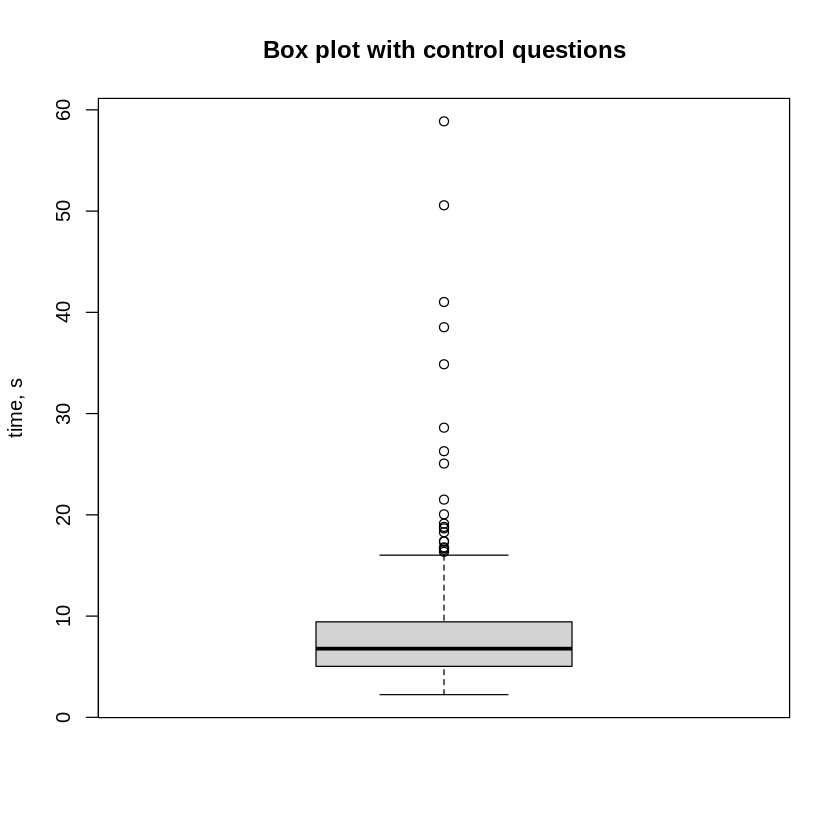

In [53]:
boxplot(control_questions$clean_time,
  ylab = "time, s",
  main = 'Box plot with control questions'
)

In [57]:
identify_outliers(
  data = control_questions,
  variable = 'clean_time'
)

,id_person,id_item,id_list,adjective,type,judgement,print_time,judge_time,clean_time,is.outlier,is.extreme
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
B00_1741177644,1741177644,00,B,-,control,5,1741177562196,1741177581326,19.130,TRUE,FALSE
B0_1741177831,1741177831,0,B,-,control,1,1741177719182,1741177736552,17.370,TRUE,FALSE
C000_1741180580,1741180580,000,C,-,control,5,1741180232229,1741180258512,26.283,TRUE,TRUE
C0_1741180580,1741180580,0,C,-,control,1,1741180497269,1741180547844,50.575,TRUE,TRUE
A00_1741182117,1741182117,00,A,-,control,5,1741177907811,1741177926471,18.660,TRUE,FALSE
B000_1741189203,1741189203,000,B,-,control,5,1741188951672,1741188973177,21.505,TRUE,FALSE
B00_1741189203,1741189203,00,B,-,control,5,1741188973721,1741189008592,34.871,TRUE,TRUE
B0_1741189203,1741189203,0,B,-,control,3,1741189023627,1741189040987,17.360,TRUE,FALSE
B0_1741189407,1741189407,0,B,-,control,1,1741189191827,1741189230359,38.532,TRUE,TRUE


In [19]:
second_exp[second_exp$id_person == '1741180580',]

,id_person,id_item,id_list,adjective,type,judgement,print_time,judge_time,clean_time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
C00_1741180580,1741180580,00,C,-,control,5,1741180203027,1741180214713,11.686
C14_1741180580,1741180580,14,C,быстрая,false,3,1741180215229,1741180231716,16.487
C000_1741180580,1741180580,000,C,-,control,5,1741180232229,1741180258512,26.283
C3_1741180580,1741180580,3,C,-,true,3,1741180259024,1741180273214,14.190
C6_1741180580,1741180580,6,C,-,true,3,1741180273727,1741180286072,12.345
C16_1741180580,1741180580,16,C,умная,false,3,1741180286585,1741180296330,9.745
C2_1741180580,1741180580,2,C,-,true,4,1741180296844,1741180332347,35.503
C19_1741180580,1741180580,19,C,низкая,false,3,1741180332868,1741180410446,77.578
C15_1741180580,1741180580,15,C,добрая,false,3,1741180410964,1741180420228,9.264
